# Self-harm & interpersonal 

In [49]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.stats as st

In [6]:
#create a dataframe from Self-harm sheet

filepath = "Data Files/Cleaned Files/Copy of mort_cleaned.xlsx"

xls = pd.ExcelFile(filepath)

df_Self_harm_interpersonal   = pd.read_excel(xls,'Self-harm & interpersonal ')

In [8]:
filepath2 = "Data Files/Cleaned Files/NIH Data Alcohol Consumption.csv"
filepath3 = "Data Files/Cleaned Files/NIH Data FIPS.csv"
filepath4 = "Data Files/Cleaned Files/NIH Beverage Codes.csv"

df_nih = pd.read_csv(filepath2)
df_beverage_codes = pd.read_csv(filepath4)
df_fips_codes = pd.read_csv(filepath3)

In [9]:
df_nih.head()

,Year,FIPS,Type of beverage,Gallons of beverage,Gallons of ethanol,Population (14 and older),Gallons of ethanol per capita age 14 and older,Decile for per capita consumption age 14 and older,Population (21 and older),Gallons of ethanol per capita age 21 and older,Decile for per capita consumption age 21 and older,Type of data source,Time-varying alcohol by volume (ABV),Gallons of ethanol derived from time-varying ABV
0,1970,1,1,3863000,1738350,2499000,6956,9.0,2020000,8606,9.0,.,.,.
1,1970,1,2,1412000,225920,2499000,904,9.0,2020000,1118,9.0,.,.,.
2,1970,1,3,33098000,1489410,2499000,5960,10.0,2020000,7373,10.0,.,.,.
3,1970,1,4,.,3453680,2499000,13820,10.0,2020000,17097,10.0,.,.,.
4,1970,2,1,945000,425250,205000,20744,1.0,165000,25773,1.0,.,.,.


In [10]:
df_nih_merged = pd.merge(df_nih, df_beverage_codes, how="left", left_on = 'Type of beverage', right_on = 'Beverage ID')
df_nih_merged = pd.merge(df_nih_merged, df_fips_codes, how="left", left_on = 'FIPS', right_on = 'FIPS')
df_nih_merged.head()

,Year,FIPS,Type of beverage,Gallons of beverage,Gallons of ethanol,Population (14 and older),Gallons of ethanol per capita age 14 and older,Decile for per capita consumption age 14 and older,Population (21 and older),Gallons of ethanol per capita age 21 and older,Decile for per capita consumption age 21 and older,Type of data source,Time-varying alcohol by volume (ABV),Gallons of ethanol derived from time-varying ABV,Beverage ID,Beverage Type,State
0,1970,1,1,3863000,1738350,2499000,6956,9.0,2020000,8606,9.0,.,.,.,1,Spirits,Alabama
1,1970,1,2,1412000,225920,2499000,904,9.0,2020000,1118,9.0,.,.,.,2,Wine,Alabama
2,1970,1,3,33098000,1489410,2499000,5960,10.0,2020000,7373,10.0,.,.,.,3,Beer,Alabama
3,1970,1,4,.,3453680,2499000,13820,10.0,2020000,17097,10.0,.,.,.,4,All Beverages,Alabama
4,1970,2,1,945000,425250,205000,20744,1.0,165000,25773,1.0,.,.,.,1,Spirits,Alaska


In [11]:
# Create subsets for year

nih_1980 = df_nih_merged.loc[(df_nih_merged['Year'] == 1980) & (df_nih_merged['FIPS'] < 60)]
nih_1985 = df_nih_merged.loc[(df_nih_merged['Year'] == 1985) & (df_nih_merged['FIPS'] < 60)]
nih_1990 = df_nih_merged.loc[(df_nih_merged['Year'] == 1990) & (df_nih_merged['FIPS'] < 60)]
nih_1995 = df_nih_merged.loc[(df_nih_merged['Year'] == 1995) & (df_nih_merged['FIPS'] < 60)]
nih_2000 = df_nih_merged.loc[(df_nih_merged['Year'] == 2000) & (df_nih_merged['FIPS'] < 60)]
nih_2005 = df_nih_merged.loc[(df_nih_merged['Year'] == 2005) & (df_nih_merged['FIPS'] < 60)]
nih_2010 = df_nih_merged.loc[(df_nih_merged['Year'] == 2010) & (df_nih_merged['FIPS'] < 60)]
nih_2014 = df_nih_merged.loc[(df_nih_merged['Year'] == 2014) & (df_nih_merged['FIPS'] < 60)]

In [12]:
# Get States Data from Self Harm DataFrame
df_self_harm_interpersonal = df_Self_harm_interpersonal.loc[df_Self_harm_interpersonal['FIPS'] < 60]

df_self_harm_interpersonal .head()

,Location,FIPS,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014"
1,Alabama,1.0,"30.16 (29.21, 31.08)","28.20 (27.59, 28.85)","28.77 (28.18, 29.39)","28.32 (27.65, 28.98)","25.34 (24.77, 25.93)","26.49 (25.93, 27.10)","26.09 (25.48, 26.71)","26.53 (25.71, 27.30)","-12.03 (-15.95, -8.08)"
69,Alaska,2.0,"24.67 (23.31, 25.95)","25.03 (23.99, 26.05)","26.44 (25.50, 27.43)","28.49 (27.49, 29.50)","26.70 (25.79, 27.67)","28.59 (27.52, 29.60)","29.85 (28.78, 31.03)","31.54 (30.30, 32.89)","27.86 (19.73, 37.02)"
99,Arizona,4.0,"30.24 (29.20, 31.30)","28.48 (27.80, 29.20)","29.36 (28.73, 30.09)","30.19 (29.51, 30.90)","26.15 (25.58, 26.77)","28.37 (27.80, 28.96)","26.32 (25.70, 26.95)","25.93 (25.17, 26.70)","-14.25 (-18.00, -10.08)"
115,Arkansas,5.0,"27.56 (26.66, 28.46)","26.74 (26.16, 27.36)","27.25 (26.68, 27.88)","27.36 (26.73, 28.01)","24.47 (23.92, 25.06)","25.86 (25.30, 26.42)","26.22 (25.60, 26.89)","27.51 (26.69, 28.33)","-0.19 (-4.93, 4.43)"
191,California,6.0,"29.72 (28.89, 30.52)","26.53 (26.06, 27.05)","25.07 (24.67, 25.53)","23.54 (23.11, 23.97)","18.25 (17.91, 18.60)","18.36 (18.01, 18.69)","16.73 (16.40, 17.07)","16.12 (15.69, 16.56)","-45.75 (-47.91, -43.46)"


In [13]:
# Create new dataframe for 1980 substance abuse
nih_1980_merged_harm = pd.merge(nih_1980, df_self_harm_interpersonal, how = 'left', left_on = 'State', right_on = 'Location' )

In [14]:
# Grab only needed columns
nih_1980_merged_harm = nih_1980_merged_harm[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1980*','Location']]
nih_1980_merged_harm.head()

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,"Mortality Rate, 1980*",Location
0,1980,1,1,8959,"30.16 (29.21, 31.08)",Alabama
1,1980,1,2,1960,"30.16 (29.21, 31.08)",Alabama
2,1980,1,3,11504,"30.16 (29.21, 31.08)",Alabama
3,1980,1,4,22423,"30.16 (29.21, 31.08)",Alabama
4,1980,2,1,20345,"24.67 (23.31, 25.95)",Alaska


In [20]:
# Create a subset for each year for Self-harm & interpersonal type and grab only needed columns

nih_1980_merged_harm = pd.merge(nih_1980, df_self_harm_interpersonal, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1980_merged_harm = nih_1980_merged_harm[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1980*','Location']]

nih_1985_merged_harm = pd.merge(nih_1985, df_self_harm_interpersonal, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1985_merged_harm = nih_1985_merged_harm[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1985*','Location']]

nih_1990_merged_harm = pd.merge(nih_1990, df_self_harm_interpersonal, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1990_merged_harm = nih_1990_merged_harm[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1990*','Location']]

nih_1995_merged_harm = pd.merge(nih_1995, df_self_harm_interpersonal, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1995_merged_harm = nih_1995_merged_harm[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1995*','Location']]

nih_2000_merged_harm = pd.merge(nih_2000, df_self_harm_interpersonal, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2000_merged_harm = nih_2000_merged_harm[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2000*','Location']]

nih_2005_merged_harm = pd.merge(nih_2005, df_self_harm_interpersonal, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2005_merged_harm = nih_2005_merged_harm[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2005*','Location']]

nih_2010_merged_harm = pd.merge(nih_2010, df_self_harm_interpersonal, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2010_merged_harm = nih_2010_merged_harm[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2010*','Location']]

nih_2014_merged_harm = pd.merge(nih_2014, df_self_harm_interpersonal, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2014_merged_harm = nih_2014_merged_harm[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2014*','Location']]

nih_2014_merged_harm.head()

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,"Mortality Rate, 2014*",Location
0,2014,1,1,6945,"26.53 (25.71, 27.30)",Alabama
1,2014,1,2,2861,"26.53 (25.71, 27.30)",Alabama
2,2014,1,3,12693,"26.53 (25.71, 27.30)",Alabama
3,2014,1,4,22499,"26.53 (25.71, 27.30)",Alabama
4,2014,2,1,13197,"31.54 (30.30, 32.89)",Alaska


In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of Beverage Type

mean = df_nih_merged.groupby('Beverage Type')['Gallons of ethanol per capita age 21 and older'].mean()
median = df_nih_merged.groupby('Beverage Type')['Gallons of ethanol per capita age 21 and older'].median()
variance = df_nih_merged.groupby('Beverage Type')['Gallons of ethanol per capita age 21 and older'].var()
standard_dv = df_nih_merged.groupby('Beverage Type')['Gallons of ethanol per capita age 21 and older'].std()
sem = df_nih_merged.groupby('Beverage Type')['Gallons of ethanol per capita age 21 and older'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, 
                           "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Beverage Type,,,,,
All Beverages,29096.406786,27380.0,6.248164e+07,7904.532914,149.381631
Beer,14729.713214,14621.5,7.741750e+06,2782.400130,52.582420
Spirits,10497.378214,9214.5,2.458155e+07,4957.977933,93.696976
Wine,3869.328571,3531.5,3.930034e+06,1982.431433,37.464433


In [34]:
# Rename Mortality Rate column
nih_1980_merged_harm.rename(columns={"Mortality Rate, 1980*": "Mortality Rate"}, inplace = True)
nih_1985_merged_harm.rename(columns={"Mortality Rate, 1985*": "Mortality Rate"}, inplace = True)
nih_1990_merged_harm.rename(columns={"Mortality Rate, 1990*": "Mortality Rate"}, inplace = True)
nih_1995_merged_harm.rename(columns={"Mortality Rate, 1995*": "Mortality Rate"}, inplace = True)
nih_2000_merged_harm.rename(columns={"Mortality Rate, 2000*": "Mortality Rate"}, inplace = True)
nih_2005_merged_harm.rename(columns={"Mortality Rate, 2005*": "Mortality Rate"}, inplace = True)
nih_2010_merged_harm.rename(columns={"Mortality Rate, 2010*": "Mortality Rate"}, inplace = True)
nih_2014_merged_harm.rename(columns={"Mortality Rate, 2014*": "Mortality Rate"}, inplace = True)

In [35]:
# Concatenate all year dataframes

frames_harm =  [nih_1980_merged_harm, 
                nih_1985_merged_harm,
                nih_1990_merged_harm,
                nih_1995_merged_harm,
                nih_2000_merged_harm,
                nih_2005_merged_harm,
                nih_2010_merged_harm,
                nih_2014_merged_harm]

df_concat_harm = pd.concat(frames_harm)

df_concat_harm

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Location
0,1980,1,1,8959,"30.16 (29.21, 31.08)",Alabama
1,1980,1,2,1960,"30.16 (29.21, 31.08)",Alabama
2,1980,1,3,11504,"30.16 (29.21, 31.08)",Alabama
3,1980,1,4,22423,"30.16 (29.21, 31.08)",Alabama
4,1980,2,1,20345,"24.67 (23.31, 25.95)",Alaska
...,...,...,...,...,...,...
199,2014,55,4,33634,"17.22 (16.67, 17.72)",Wisconsin
200,2014,56,1,13061,"26.98 (25.95, 28.00)",Wyoming
201,2014,56,2,3460,"26.98 (25.95, 28.00)",Wyoming
202,2014,56,3,14129,"26.98 (25.95, 28.00)",Wyoming


In [36]:

df_concat_harm = pd.merge(df_concat_harm,df_beverage_codes, how='left', left_on ='Type of beverage', right_on = 'Beverage ID')


In [37]:
df_concat_harm_clean = df_concat_harm['Mortality Rate'].str.split(' ').str.get(0).astype(float)

In [38]:
df_concat_harm['Mortality Rate'] = df_concat_harm_clean

In [39]:
df_concat_harm

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Location,Beverage ID,Beverage Type
0,1980,1,1,8959,30.16,Alabama,1,Spirits
1,1980,1,2,1960,30.16,Alabama,2,Wine
2,1980,1,3,11504,30.16,Alabama,3,Beer
3,1980,1,4,22423,30.16,Alabama,4,All Beverages
4,1980,2,1,20345,24.67,Alaska,1,Spirits
...,...,...,...,...,...,...,...,...
1627,2014,55,4,33634,17.22,Wisconsin,4,All Beverages
1628,2014,56,1,13061,26.98,Wyoming,1,Spirits
1629,2014,56,2,3460,26.98,Wyoming,2,Wine
1630,2014,56,3,14129,26.98,Wyoming,3,Beer


In [41]:
# Isolate rows for all beverages
df_concat_harm4 = df_concat_harm.loc[df_concat_harm['Beverage ID'] == 4]
df_concat_harm1 = df_concat_harm.loc[df_concat_harm['Beverage ID'] == 1]
df_concat_harm2 = df_concat_harm.loc[df_concat_harm['Beverage ID'] == 2]
df_concat_harm3 = df_concat_harm.loc[df_concat_harm['Beverage ID'] == 3]

In [42]:
df_concat_harm4.describe()

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Beverage ID
count,408.00000,408.000000,408.0,408.000000,392.000000,408.0
mean,1997.37500,28.960784,4.0,28492.458333,21.968776,4.0
std,11.28257,15.696083,0.0,7293.558657,5.035126,0.0
min,1980.00000,1.000000,4.0,14730.000000,12.910000,4.0
25%,1988.75000,16.000000,4.0,23933.750000,17.787500,4.0
50%,1997.50000,29.000000,4.0,26947.000000,21.670000,4.0
75%,2006.25000,42.000000,4.0,31153.250000,25.612500,4.0
max,2014.00000,56.000000,4.0,67723.000000,41.620000,4.0


In [43]:
# Remove nulls

df_concat_harm4.dropna(inplace=True)
df_concat_harm1.dropna(inplace=True)
df_concat_harm2.dropna(inplace=True)
df_concat_harm3.dropna(inplace=True)

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [44]:
df_concat_harm2.describe()

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Beverage ID
count,392.000000,392.000000,392.0,392.000000,392.000000,392.0
mean,1997.375000,29.244898,2.0,3676.864796,21.968776,2.0
std,11.283135,15.793463,0.0,1731.338908,5.035126,0.0
min,1980.000000,1.000000,2.0,976.000000,12.910000,2.0
25%,1988.750000,17.000000,2.0,2291.500000,17.787500,2.0
50%,1997.500000,29.000000,2.0,3387.500000,21.670000,2.0
75%,2006.250000,42.000000,2.0,4890.500000,25.612500,2.0
max,2014.000000,56.000000,2.0,9649.000000,41.620000,2.0


In [45]:
df_concat_harm2

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Location,Beverage ID,Beverage Type
1,1980,1,2,1960,30.16,Alabama,2,Wine
5,1980,2,2,6036,24.67,Alaska,2,Wine
9,1980,4,2,4277,30.24,Arizona,2,Wine
13,1980,5,2,1464,27.56,Arkansas,2,Wine
17,1980,6,2,8406,29.72,California,2,Wine
...,...,...,...,...,...,...,...,...
1613,2014,51,2,5323,18.18,Virginia,2,Wine
1617,2014,53,2,5924,19.38,Washington,2,Wine
1621,2014,54,2,1086,25.06,West Virginia,2,Wine
1625,2014,55,2,4269,17.22,Wisconsin,2,Wine


In [46]:
x_values4 = df_concat_harm4['Gallons of ethanol per capita age 21 and older']
y_values4 = df_concat_harm4['Mortality Rate']

x_values1 = df_concat_harm1['Gallons of ethanol per capita age 21 and older']
y_values1 = df_concat_harm1['Mortality Rate']

x_values2 = df_concat_harm2['Gallons of ethanol per capita age 21 and older']
y_values2 = df_concat_harm2['Mortality Rate']

x_values3 = df_concat_harm3['Gallons of ethanol per capita age 21 and older']
y_values3 = df_concat_harm3['Mortality Rate']

Text(0, 0.5, 'Mortality Rate')

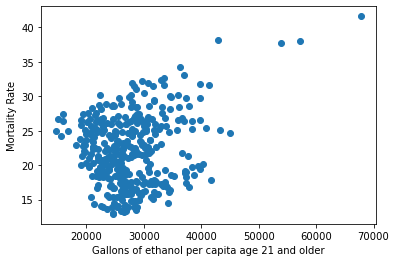

In [50]:
plt.scatter(x_values4,y_values4)
plt.xlabel('Gallons of ethanol per capita age 21 and older')
plt.ylabel('Mortality Rate')

In [51]:
# Calculate correlation

corr4= st.pearsonr(x_values4,y_values4)
corr1= st.pearsonr(x_values1,y_values1)
corr2= st.pearsonr(x_values2,y_values2)
corr3= st.pearsonr(x_values3,y_values3)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values2, y_values2)
regress_values2 = x_values2 * slope + intercept
line_eq2 = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))




print(f"The correlation between ethanol consumption and mortality rate for all beverages is {corr4}")
print(f"The correlation between ethanol consumption and mortality rate for spirits is {corr1}")
print(f"The correlation between ethanol consumption and mortality rate for wine is {corr2}")
print(f"The correlation between ethanol consumption and mortality rate for beer is {corr3}")

The correlation between ethanol consumption and mortality rate for all beverages is (0.21978363698428455, 1.1261906846866181e-05)
The correlation between ethanol consumption and mortality rate for spirits is (0.21767240904046714, 1.372731070243925e-05)
The correlation between ethanol consumption and mortality rate for wine is (-0.08863250785049955, 0.0796567917496059)
The correlation between ethanol consumption and mortality rate for beer is (0.29229191722702563, 3.681711294588834e-09)


Text(0, 0.5, 'Mortality Rate')

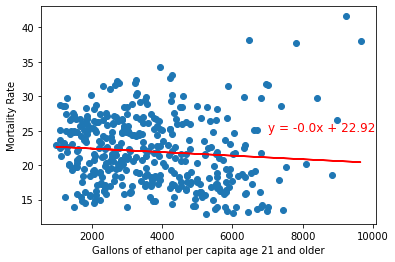

In [52]:
plt.scatter(x_values2,y_values2)
plt.plot(x_values2,regress_values2,"r-")
plt.annotate(line_eq2,(7000,25),fontsize=12,color="red")
plt.xlabel('Gallons of ethanol per capita age 21 and older')
plt.ylabel('Mortality Rate')

In [54]:
# Outliers

df_concat_harm4_1980 = df_concat_harm4.loc[df_concat_harm4['Year'] == 1980]
df_concat_harm4_1985 = df_concat_harm4.loc[df_concat_harm4['Year'] == 1985]
df_concat_harm4_1990 = df_concat_harm4.loc[df_concat_harm4['Year'] == 1990]
df_concat_harm4_1995 = df_concat_harm4.loc[df_concat_harm4['Year'] == 1995]
df_concat_harm4_2000 = df_concat_harm4.loc[df_concat_harm4['Year'] == 2000]
df_concat_harm4_2005 = df_concat_harm4.loc[df_concat_harm4['Year'] == 2005]
df_concat_harm4_2010 = df_concat_harm4.loc[df_concat_harm4['Year'] == 2010]
df_concat_harm4_2014 = df_concat_harm4.loc[df_concat_harm4['Year'] == 2014]

In [55]:
df_concat_harm4_1980.head()

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Location,Beverage ID,Beverage Type
3,1980,1,4,22423,30.16,Alabama,4,All Beverages
7,1980,2,4,44974,24.67,Alaska,4,All Beverages
11,1980,4,4,35985,30.24,Arizona,4,All Beverages
15,1980,5,4,21641,27.56,Arkansas,4,All Beverages
19,1980,6,4,39809,29.72,California,4,All Beverages


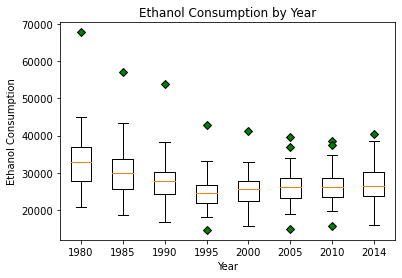

In [56]:
data_by_year4 = [df_concat_harm4_1980['Gallons of ethanol per capita age 21 and older'], 
                df_concat_harm4_1985['Gallons of ethanol per capita age 21 and older'],
                df_concat_harm4_1990['Gallons of ethanol per capita age 21 and older'],
                df_concat_harm4_1995['Gallons of ethanol per capita age 21 and older'],
                df_concat_harm4_2000['Gallons of ethanol per capita age 21 and older'],
                df_concat_harm4_2005['Gallons of ethanol per capita age 21 and older'],
                df_concat_harm4_2010['Gallons of ethanol per capita age 21 and older'],
                df_concat_harm4_2014['Gallons of ethanol per capita age 21 and older']]

year_labels = ['1980','1985','1990','1995','2000','2005','2010','2014']

# Format outlier marker
green_format = dict(markerfacecolor='g', marker='D')

# Plot the data
fig, ax = plt.subplots()
ax.set_title('Ethanol Consumption by Year')
ax.set_ylabel('Ethanol Consumption')
ax.set_xlabel('Year')
ax.boxplot(data_by_year4, flierprops=green_format, labels=year_labels)

plt.show()

In [57]:
year_labels = ['1980','1985','1990','1995','2000','2005','2010','2014']


# Create empty list to fill with tumor vol data (for plotting)
ethanol_list4 = []
outliers_list4 = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for year in year_labels:
    
    # Locate the rows for each year
    
    ethanol_consumption = df_concat_harm4.loc[(df_concat_harm4['Year'] == year)]
    ethanol_consumption = df_concat_harm4.iloc[:,3]

    
    # Get upper and lower bounds

    quartiles = ethanol_consumption.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Add subset to ethanol list  and state list
    
    ethanol_consumption = pd.DataFrame(ethanol_consumption)
    ethanol_list4.append(ethanol_consumption)    
    
    # Determine outliers using upper and lower bounds
    
    outliers4 = ethanol_consumption.loc[(ethanol_consumption['Gallons of ethanol per capita age 21 and older'] > upper_bound) | (ethanol_consumption['Gallons of ethanol per capita age 21 and older'] < lower_bound)]
    outliers4 = outliers4.squeeze()
    outliers_list4.append(outliers4)    

    # Print results
    
    print(f"{year}'s lower bound is: {lower_bound}.")
    print(f"{year}'s upper bound is: {upper_bound}.")
    print(f"{year}'s potential outliers are: {outliers4}")
    print("---------------------------------------------------")

1980's lower bound is: 13665.125.
1980's upper bound is: 40758.125.
1980's potential outliers are: 7      44974
115    67723
199    41758
203    40846
211    43293
319    57109
523    53868
727    42953
931    41366
Name: Gallons of ethanol per capita age 21 and older, dtype: int64
---------------------------------------------------
1985's lower bound is: 13665.125.
1985's upper bound is: 40758.125.
1985's potential outliers are: 7      44974
115    67723
199    41758
203    40846
211    43293
319    57109
523    53868
727    42953
931    41366
Name: Gallons of ethanol per capita age 21 and older, dtype: int64
---------------------------------------------------
1990's lower bound is: 13665.125.
1990's upper bound is: 40758.125.
1990's potential outliers are: 7      44974
115    67723
199    41758
203    40846
211    43293
319    57109
523    53868
727    42953
931    41366
Name: Gallons of ethanol per capita age 21 and older, dtype: int64
-----------------------------------------------

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [59]:
# Create a groupby for Year
harm4_year_group = df_concat_harm4.groupby('Year')

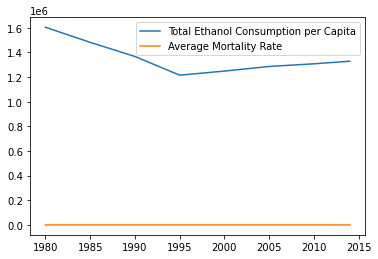

In [61]:
# Plotting line graph
sum_ethanol4 = pd.DataFrame(harm4_year_group["Gallons of ethanol per capita age 21 and older"].sum()).reset_index()
avg_mortality4 = pd.DataFrame(harm4_year_group["Mortality Rate"].mean()).reset_index()


plt.plot(sum_ethanol4['Year'], sum_ethanol4['Gallons of ethanol per capita age 21 and older'], label = "Total Ethanol Consumption per Capita")
plt.plot(avg_mortality4['Year'], avg_mortality4['Mortality Rate'], label = "Average Mortality Rate")
plt.legend()
plt.show()